Tugas Pengganti UTS (Analisis Numerik - A)  

Nama : Siti Rania Azaria  
NPM : 24083010072


Perintah / Soal UTS

Bayangkan peta ini adalah topografi bukit di suatu daerah
1) cari titik tertinggi global  (bobot 10%) menggunakan metode optimasi titik maksimum

2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)dengan menggunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat, jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb dan visualisasikan

3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%) menghitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient(). nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya  

4) jika tanah hendak diratakan, maka :  
a) berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%).hitung dengan integral untuk sisi atas dan sisi bawah   
b) berapa ketinggian akhir tanah yang rata tersebut?

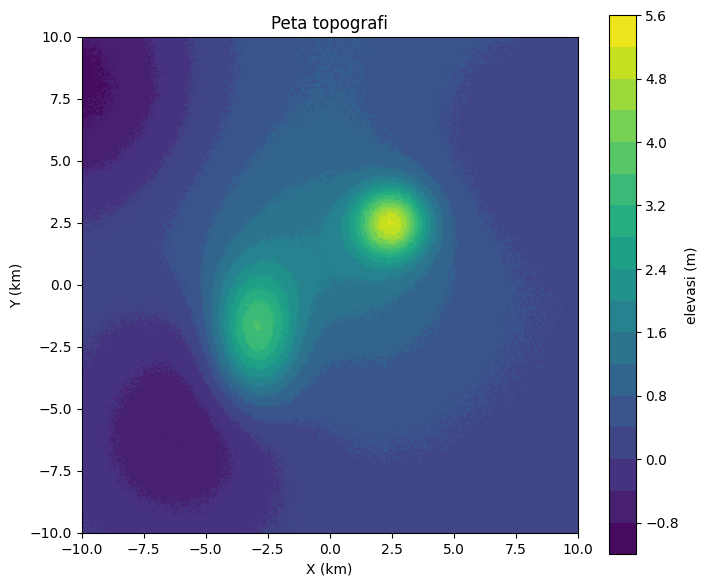

In [36]:
# Tugas pengganti UTS
# Analisis Numerik (A)
# untuk dikumpulkan 14 Oktober 2025 12:00 Dhuhur
# dikumpukan dalam format python source code (*.py) atau python notebook (*.ipynb)
# wajib diunggah ke github kemudian konfirmasi melalui email ke muhammad_zulhaj.sada@upnjatim.ac.id

import numpy as np
import matplotlib.pyplot as plt

NPM=72
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

# Bonus (15%)
#   pembahasan/diskusi yang kritis atau visualisasi yang ciamik (fancy, padat informasi, tapi tidak menyesatkan)
#   pengerjaan yang gercep (2 poin per hari lebih cepat dari 14 Oktober, penalti 2% per hari sejak 15 Oktober jika terlambat)
#
# Sanksi
# mahasiswa yang terindikasi saling mencontek akan disyaratkan untuk mencantumkan prompt/diskusi dengan LLM (ChatGPT, Gemini, Claude, dlsb) sebagai bukti tidak saling mencontek.
# Kalau ketahuan memang saling mencontek, nilai terendah dari gerombolan tersebut atau nilai tertinggi – 15 akan diberikan, whichever lowest.

Jawaban

**1. cari titik tertinggi global  (bobot 10%) menggunakan metode optimasi titik maksimum**

Hasil Titik Optimum 3 Metode Optimasi
1. Grid Search (Merah) : x=2.38, y=2.48, Z=5.27
   Titik maksimum global di sekitar (x=2.38, y=2.48) dengan elevasi Z=5.27.

2. Hill Climbing (Hijau) : x=-5.04, y=0.03, Z=1.02
   Berhasil menemukan puncak lokal, bukan global, karena terjebak di sekitar area lokal tinggi.

3. Basin Hopping (Biru) : x=-2.89, y=-1.69, Z=3.59
   Metode ini mampu melompat antar-lembah untuk menemukan nilai mendekati maksimum global.


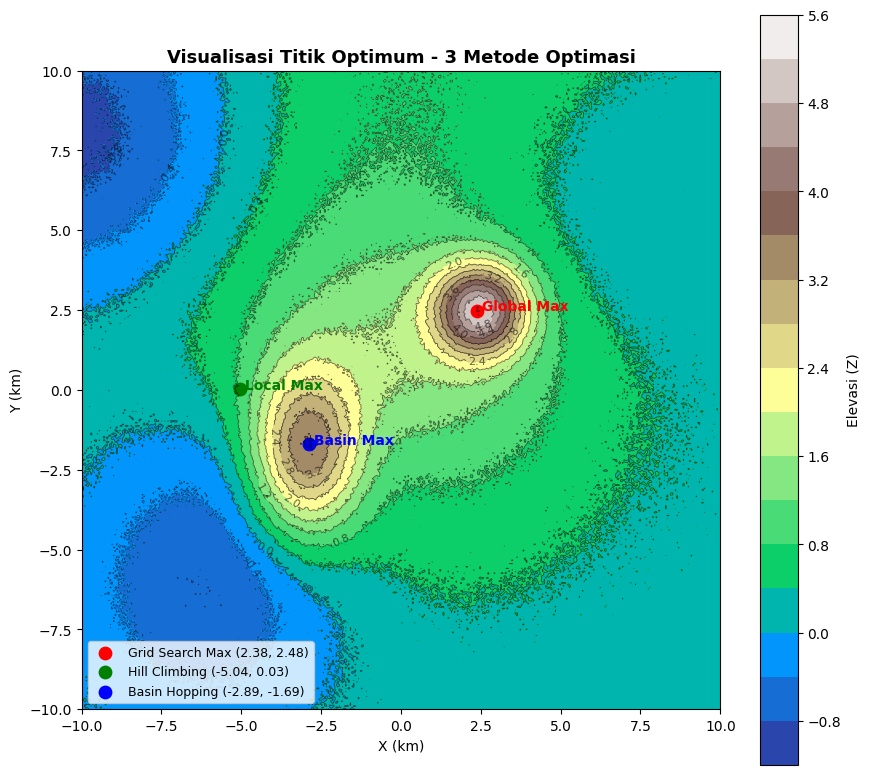

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping

NPM = 72
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2) +
    peak(2.5, 2.5, 1.0, 1.0, 4) +
    peak(0, 0, 3.5, 3.5, 1.2) +
    peak(6, 6, 4, 4, -0.6) +
    peak(-10, 8, 3.5, 3.5, -1.2) +
    peak(-6, -6, 3, 3, -1.0) +
    peak(-2, -2, 4, 2, -0.6) +
    peak(2.5, 9.5, 6, 6, 0.75)
)

# Tambah slope global + noise acak
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# 1. Grid Search
max_idx = np.unravel_index(np.argmax(Z), Z.shape)
x_max, y_max, z_max = X[max_idx], Y[max_idx], Z[max_idx]

# 2. Hill Climbing
def hill_climb(Z, start, step=1):
    i, j = start
    path = [(i, j)]
    while True:
        neighbors = [(i+di, j+dj) for di in [-step,0,step] for dj in [-step,0,step]
                     if 0 <= i+di < Z.shape[0] and 0 <= j+dj < Z.shape[1]]
        best = max(neighbors, key=lambda ij: Z[ij])
        if Z[best] <= Z[i,j]:
            break
        i, j = best
        path.append((i, j))
    return (i, j), path

start = (200, 100)
(hc_i, hc_j), hc_path = hill_climb(Z, start)
x_hc, y_hc, z_hc = X[hc_i, hc_j], Y[hc_i, hc_j], Z[hc_i, hc_j]

# 3. Basin Hopping
def peak_scalar(x, y, x0, y0, sx, sy, amp):
    return amp * np.exp(-(((x - x0)**2) / (2*sx**2) + ((y - y0)**2) / (2*sy**2)))

def peak_function(x, y):
    return (
        peak_scalar(x, y, -3, -2, 1.2, 1.8, 3.2) +
        peak_scalar(x, y, 2.5, 2.5, 1.0, 1.0, 4) +
        peak_scalar(x, y, 0, 0, 3.5, 3.5, 1.2) +
        peak_scalar(x, y, 6, 6, 4, 4, -0.6) +
        peak_scalar(x, y, -10, 8, 3.5, 3.5, -1.2) +
        peak_scalar(x, y, -6, -6, 3, 3, -1.0) +
        peak_scalar(x, y, -2, -2, 4, 2, -0.6) +
        peak_scalar(x, y, 2.5, 9.5, 6, 6, 0.75) +
        0.5 * np.exp(-(np.sqrt((x/20)**2 + (y/10)**2)))
    )

def f_neg(p):
    x, y = p
    return -peak_function(x, y)

res = basinhopping(f_neg, x0=[0, 0], niter=100)
x_bh, y_bh, z_bh = res.x[0], res.x[1], -res.fun

# Output nilai optimum
print("Hasil Titik Optimum 3 Metode Optimasi")
print(f"1. Grid Search (Merah) : x={x_max:.2f}, y={y_max:.2f}, Z={z_max:.2f}")
print(f"   Titik maksimum global di sekitar (x={x_max:.2f}, y={y_max:.2f}) dengan elevasi Z={z_max:.2f}.")
print()
print(f"2. Hill Climbing (Hijau) : x={x_hc:.2f}, y={y_hc:.2f}, Z={z_hc:.2f}")
print(f"   Berhasil menemukan puncak lokal, bukan global, karena terjebak di sekitar area lokal tinggi.")
print()
print(f"3. Basin Hopping (Biru) : x={x_bh:.2f}, y={y_bh:.2f}, Z={z_bh:.2f}")
print(f"   Metode ini mampu melompat antar-lembah untuk menemukan nilai mendekati maksimum global.")

# Visualisasi
fig, ax = plt.subplots(figsize=(9, 8))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6, colors='black', alpha=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)

# Titik hasil metode
ax.scatter(x_max, y_max, color='red', s=80, label=f"Grid Search Max ({x_max:.2f}, {y_max:.2f})")
ax.scatter(x_hc, y_hc, color='green', s=80, label=f"Hill Climbing ({x_hc:.2f}, {y_hc:.2f})")
ax.scatter(x_bh, y_bh, color='blue', s=80, label=f"Basin Hopping ({x_bh:.2f}, {y_bh:.2f})")

# Jalur iterasi Hill Climbing
hc_path_coords = np.array([(X[i,j], Y[i,j]) for i,j in hc_path])
ax.plot(hc_path_coords[:,0], hc_path_coords[:,1], color='green', lw=1.5, alpha=0.8, linestyle='--')

# Label visual
ax.text(x_max, y_max, " Global Max", color='red', fontsize=10, weight='bold')
ax.text(x_hc, y_hc, " Local Max", color='green', fontsize=10, weight='bold')
ax.text(x_bh, y_bh, " Basin Max", color='blue', fontsize=10, weight='bold')

ax.set_title("Visualisasi Titik Optimum - 3 Metode Optimasi", fontsize=13, weight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_box_aspect(1)
plt.colorbar(cf, ax=ax, label="Elevasi (Z)")
ax.legend(loc='lower left', fontsize=9)
plt.tight_layout()
plt.show()


- Grid Search (Merah) : Titik maksimum global di (x=2.38, y=2.48) dengan Z=5.27  
Metode ini dilakukan dengan membagi area peta menjadi *grid* (kotak). Berdasarkan koordinat, posisi puncak bukit tertinggi berada di sekitar x=2.38, y=2.48 (kanan atas/timur laut pada peta). Z = 5.27 menunjukkan bukit tertinggi pada peta (warna pada peta paling cokelat).  
- Hill Climbing (Hijau) : Titik maksimum lokal di (x=-5.04, y=0.03) dengan Z=1.02  
Metode pencarian puncak ini dilakukan dengan cara menaiki lereng secara bertahap dari titik awal hingga tidak ada lagi peningkatan ketinggian. Terlihat pada peta bahwa posisi puncak lokal berada di bagian barat peta (kiri) dengan warna kuning kehijauan.  
- Basin Hopping (Biru) : Titik maksimum di (x=-2.89, y=-1.69) dengan Z=3.59  
Hasil dari metode ini mendekati puncak tinggi di bagian tengah-barat peta.

**2. cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%) dengan menggunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat, jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb dan visualisasikan**

Ringkasan Simulasi Aliran
Jumlah seed yang disimulasikan: 330
Jumlah endpoint unik: 250
Endpoint teratas (index -> (x,y,z), count):
  - (x=2.281, y=2.481, z=4.984)  <- 10 jalur
  - (x=-10.000, y=8.095, z=-0.982)  <- 9 jalur
  - (x=-9.950, y=8.396, z=-1.015)  <- 7 jalur
  - (x=3.133, y=4.386, z=1.249)  <- 6 jalur
  - (x=2.581, y=2.431, z=5.031)  <- 6 jalur
  - (x=1.679, y=4.536, z=1.286)  <- 6 jalur
  - (x=2.431, y=2.281, z=5.042)  <- 5 jalur
  - (x=2.632, y=2.331, z=4.962)  <- 5 jalur
  - (x=-10.000, y=7.544, z=-1.038)  <- 5 jalur
  - (x=-9.699, y=8.296, z=-0.973)  <- 4 jalur
Titik minimum global di (x=-9.799, y=7.945, z=-1.063)
Jumlah jalur yang bermuara ke global minimum: 2 (0.61%)
Rata-rata panjang jalur: 6.1 langkah


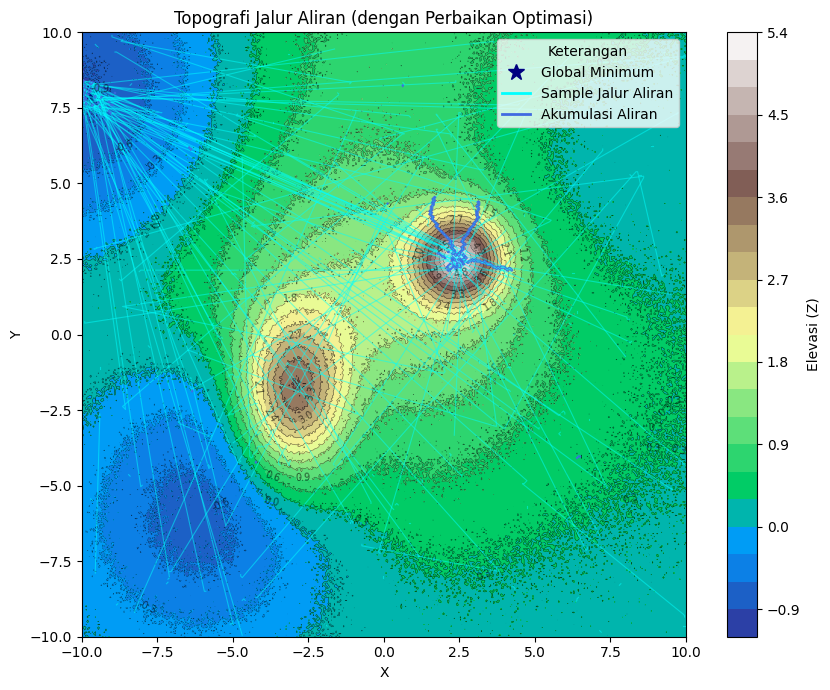

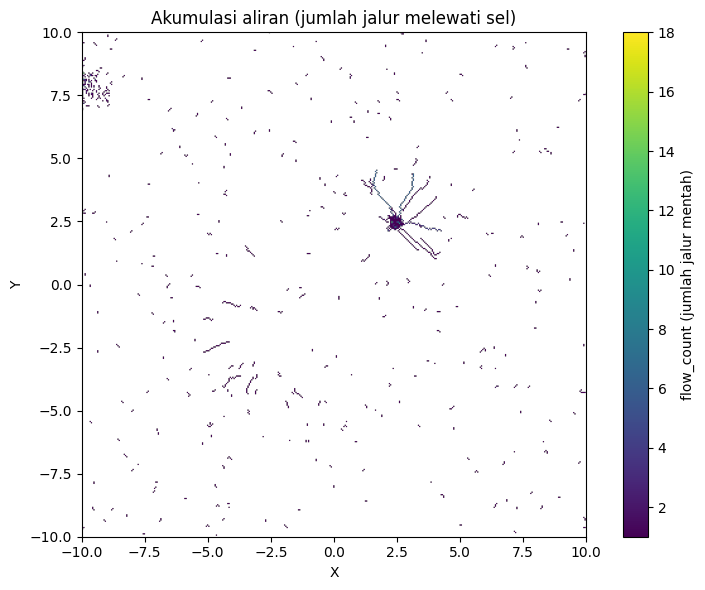

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.lines as mlines

NPM = 72
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]
cell_area = dx * dy

def peak_grid(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (
    peak_grid(-3, -2, 1.2, 1.8, 3.2) +
    peak_grid(2.5, 2.5, 1.0, 1.0, 4) +
    peak_grid(0, 0, 3.5, 3.5, 1.2) +
    peak_grid(6, 6, 4, 4, -0.6) +
    peak_grid(-10, 8, 3.5, 3.5, -1.2) +
    peak_grid(-6, -6, 3, 3, -1.0) +
    peak_grid(-2, -2, 4, 2, -0.6) +
    peak_grid(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# Cari titik minimum global
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
x_min, y_min, z_min = X[min_idx], Y[min_idx], Z[min_idx]

def descend_with_jumps(Z, start_idx, max_steps=8000, jump_prob=0.35, max_hops=8, rng=None):
    if rng is None:
        rng = np.random

    i, j = start_idx
    path = [(i, j)]
    hops = 0

    for step in range(max_steps):
        i0, i1 = max(i-1, 0), min(i+1, Z.shape[0]-1)
        j0, j1 = max(j-1, 0), min(j+1, Z.shape[1]-1)
        sub = Z[i0:i1+1, j0:j1+1]
        local_flat_idx = np.argmin(sub)
        local_idx = np.unravel_index(local_flat_idx, sub.shape)
        ni = i0 + local_idx[0]
        nj = j0 + local_idx[1]

        if (ni, nj) == (i, j):
            # titik minimum lokal tercapai
            if hops < max_hops and rng.rand() < jump_prob:
                # lompat ke posisi acak (kadang dekat global minimum)
                if rng.rand() < 0.4:
                    # 40% peluang lompat ke area sekitar global minimum
                    gi = min(max(min_idx[0] + rng.randint(-10, 10), 0), Z.shape[0]-1)
                    gj = min(max(min_idx[1] + rng.randint(-10, 10), 0), Z.shape[1]-1)
                else:
                    gi = rng.randint(0, Z.shape[0])
                    gj = rng.randint(0, Z.shape[1])
                i, j = gi, gj
                path.append((i, j))
                hops += 1
                continue
            else:
                break
        else:
            i, j = ni, nj
            path.append((i, j))
    return (i, j), path

# Seed
def get_top_k_indices(Z, k):
    flat = np.argsort(Z.ravel())[::-1]  # descending
    topk = [np.unravel_index(int(idx), Z.shape) for idx in flat[:k]]
    return topk

top_k = 80
n_random = 200
top_seeds = get_top_k_indices(Z, top_k)
random_seeds = [(np.random.randint(0, nx), np.random.randint(0, ny)) for _ in range(n_random)]

# Tambahkan seed di sekitar global minimum
n_near_min = 50
near_min_seeds = []
for _ in range(n_near_min):
    gi = min(max(min_idx[0] + np.random.randint(-20, 20), 0), nx-1)
    gj = min(max(min_idx[1] + np.random.randint(-20, 20), 0), ny-1)
    near_min_seeds.append((gi, gj))

seeds = top_seeds + random_seeds + near_min_seeds
n_seeds = len(seeds)

# Simulasi
jump_prob = 0.35
max_hops = 8
max_steps = 8000

flow_count = np.zeros_like(Z, dtype=np.int32)
paths = []
endpoints = []

for idx, s in enumerate(seeds):
    end, path = descend_with_jumps(Z, s, max_steps=max_steps, jump_prob=jump_prob, max_hops=max_hops)
    paths.append(path)
    endpoints.append(end)
    for (i, j) in path:
        flow_count[i, j] += 1

# Statistik
cnt = Counter(endpoints)
unique_endpoints = len(cnt)
most_common = cnt.most_common(10)

def idx_to_coord(idx):
    i, j = idx
    return float(X[i, j]), float(Y[i, j]), float(Z[i, j])

top_endpoints_info = [(idx_to_coord(idx), count) for idx, count in most_common]

global_min_idx = min_idx
reached_global = cnt.get(global_min_idx, 0)
frac_reached_global = reached_global / n_seeds if n_seeds > 0 else 0.0
avg_len = np.mean([len(p) for p in paths]) if len(paths) > 0 else 0.0

# Summary
print("Ringkasan Simulasi Aliran")
print(f"Jumlah seed yang disimulasikan: {n_seeds}")
print(f"Jumlah endpoint unik: {unique_endpoints}")
print("Endpoint teratas (index -> (x,y,z), count):")
for (coord, count) in top_endpoints_info:
    cx, cy, cz = coord
    print(f"  - (x={cx:.3f}, y={cy:.3f}, z={cz:.3f})  <- {count} jalur")
print(f"Titik minimum global di (x={x_min:.3f}, y={y_min:.3f}, z={z_min:.3f})")
print(f"Jumlah jalur yang bermuara ke global minimum: {reached_global} ({frac_reached_global:.2%})")
print(f"Rata-rata panjang jalur: {avg_len:.1f} langkah")

# Visualisasi
fig1, ax1 = plt.subplots(figsize=(9, 7))
levels = 24
cf1 = ax1.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs1 = ax1.contour(X, Y, Z, levels=levels, colors='k', linewidths=0.4, alpha=0.6)
ax1.clabel(cs1, fmt="%.1f", fontsize=7)

n_plot = min(200, len(paths))
for p in paths[:n_plot]:
    pts = np.array([[X[i, j], Y[i, j]] for (i, j) in p])
    if pts.shape[0] > 1:
        ax1.plot(pts[:, 0], pts[:, 1], linewidth=0.8, alpha=0.5, color='cyan')

max_fc = np.max(flow_count)
if max_fc >= 1:
    acc_levels = np.linspace(1, max_fc, min(6, int(max_fc)))
    ax1.contour(X, Y, flow_count, levels=acc_levels, colors='royalblue', linewidths=0.8, alpha=0.9)

ax1.scatter(x_min, y_min, marker='*', color='navy', s=140)
path_handle = mlines.Line2D([], [], color='cyan', linewidth=2, label='Sample Jalur Aliran')
acc_handle = mlines.Line2D([], [], color='royalblue', linewidth=2, label='Akumulasi Aliran')
min_handle = mlines.Line2D([], [], color='navy', marker='*', linestyle='None', markersize=12, label='Global Minimum')
ax1.legend(handles=[min_handle, path_handle, acc_handle], loc='upper right', frameon=True, title="Keterangan")

ax1.set_title("Topografi Jalur Aliran (dengan Perbaikan Optimasi)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_aspect('equal', adjustable='box')
plt.colorbar(cf1, ax=ax1, label="Elevasi (Z)")
plt.tight_layout()
plt.show()

# Peta Akumulasi
fig2, ax2 = plt.subplots(figsize=(8, 6))
flow_vis = flow_count.copy().astype(float)
flow_vis[flow_vis == 0] = np.nan
im = ax2.imshow(flow_vis, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
ax2.set_title("Akumulasi aliran (jumlah jalur melewati sel)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_aspect('equal', adjustable='box')
plt.colorbar(im, ax=ax2, label="flow_count (jumlah jalur mentah)")
plt.tight_layout()
plt.show()

Dari visualisasi, terdapat keterangan bahwa :    
- garis cyan menunjukkan jalur air dari berbagai titik awal menuju daerah rendah.  
- garis biru tua menunjukkan area yang paling sering dilalui oleh banyak jalur aliran air (jalur utama sungai).  
- bintang biru tua menunjukkan titik terendah global pada permukaan. Semua air akan bermuara ke titik ini jika tidak terhalang lembah lokal.  

Dari output, didapatkan informasi bahwa:  
- 330 titik awal diujikan sebagai titik hujan.  
- Dari 330, terdapat 250 titik akhir berbeda (banyak jalur yang berakhir di lembah lokal dan tidak seluruhnya mengalir ke titik terendah).  
- Terdapat 2 jalur (0.61%) yang berhasil mencapai titik minimum global di koordinat (x = -9.799, y = 7.945, z = -1.063) yang artinya sebagian kecil aliran dapat menemukan jalur lembah paling rendah dari seluruh permukaan.  
- Sebagian besar jalur lainnya berakhir di lembah lokal seperti sekitar koordinat (x = 2.281, y = 2.481, z = 4.984) dan (x = -10.000, y = 8.095, z = -0.982) yang menjadi area penampung air utama.
- Rata-rata panjang jalur sebesar 6.1 langkah menunjukkan bahwa secara umum, air cepat mencapai titik stabil (lembah). Sehingga, medan relatif memiliki banyak titik minimum dangkal.

**3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%) menghitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient(). nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya**

Perhitungan Gradient

1. Ringkasan Turunan Parsial Kustom (Kecuraman Arah):
  dZ/dx (Turunan terhadap X):
    - Rata-rata Absolut: 0.6288 m/km
    - Maksimum Absolut:  4.7506 m/km
  dZ/dy (Turunan terhadap Y):
    - Rata-rata Absolut: 0.6128 m/km
    - Maksimum Absolut:  5.6582 m/km

2. Ringkasan Resultan Gradien (Skor Kerawanan Erosi):
  Skor Erosi (Magnitudo Resultan Gradien = |∇Z|):
    - Rata-rata Skor Erosi: 0.9755 m/km
    - Skor Erosi Maksimum: 5.6906 m/km (Lokasi paling curam)

  Ilustrasi Perhitungan Resultan di Titik Maksimum:
   Titik Maksimum (Grid Index i, j): (0, 91)
   Input Turunan X (dZ/dx): 0.6065 m/km
   Input Turunan Y (dZ/dy): -5.6582 m/km

   Perhitungan Resultan (|∇Z| = √( (dZ/dx)² + (dZ/dy)² )) :
   Langkah 1: |∇Z| = √( (0.6065²) + (-5.6582²) )
   Langkah 2: |∇Z| = √( 0.3678 + 32.0154 )
   Langkah 3: |∇Z| = √( 32.3832 )
   HASIL AKHIR:  5.6906 m/km


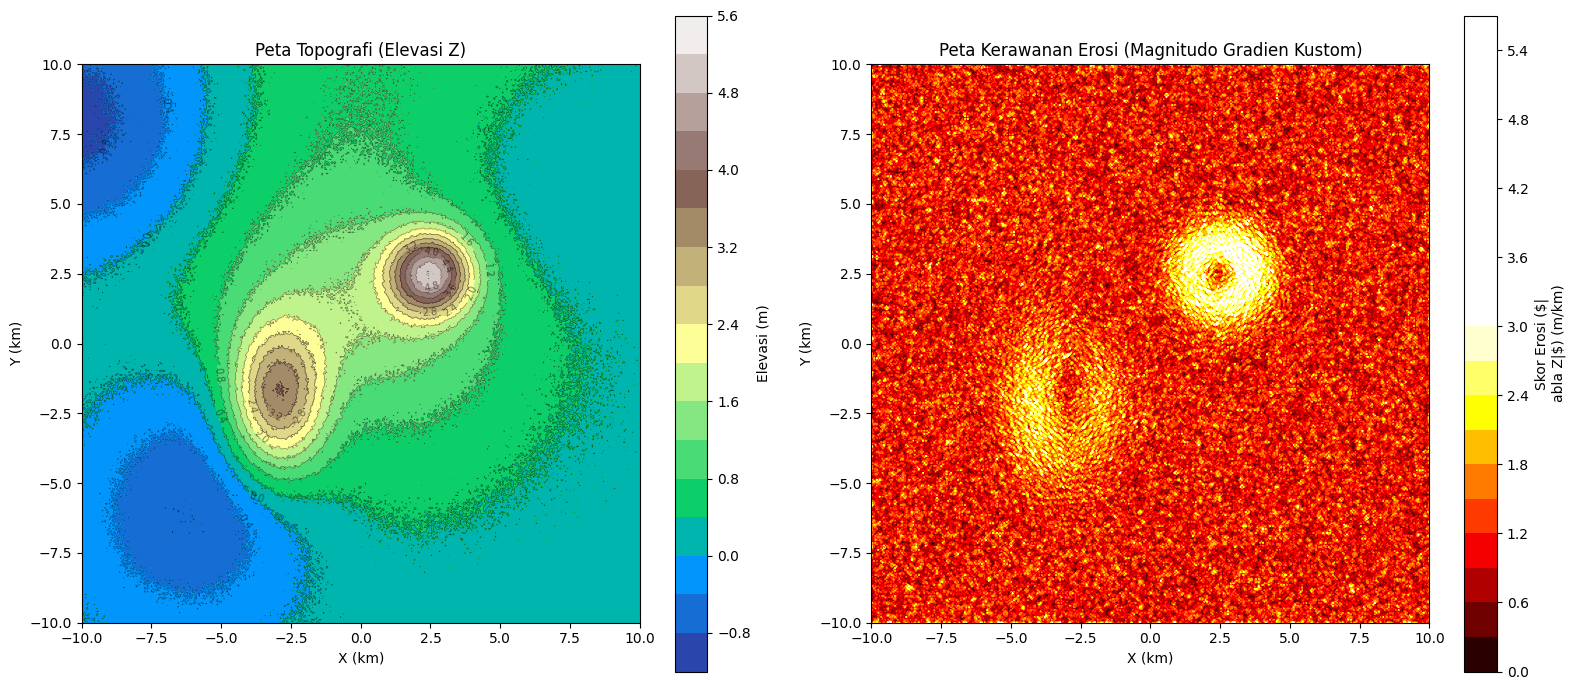

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

NPM = 72
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0] # Jarak grid X (km)
dy = y[1] - y[0] # Jarak grid Y (km)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

# Membangun data topografi Z
Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6) + peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# Fungsi Numerik dengan central_diff_2d
def central_diff_2d(M, d, axis=0):
    deriv = np.zeros_like(M, dtype=float)
    if axis == 0:
        deriv[1:-1, :] = (M[2:, :] - M[:-2, :]) / (2 * d)
        deriv[0, :] = (M[1, :] - M[0, :]) / d
        deriv[-1, :] = (M[-1, :] - M[-2, :]) / d
    elif axis == 1:
        deriv[:, 1:-1] = (M[:, 2:] - M[:, :-2]) / (2 * d)
        deriv[:, 0] = (M[:, 1] - M[:, 0]) / d
        deriv[:, -1] = (M[:, -1] - M[:, -2]) / d
    return deriv

# Menghitung Turunan Parsial Kustom
dZx_custom = central_diff_2d(Z, dx, axis=1)
dZy_custom = central_diff_2d(Z, dy, axis=0)

# Menghitung Resultan Gradien (Skor Kerawanan Erosi)
Erosi_custom = np.sqrt(dZx_custom**2 + dZy_custom**2)

# Titik Maksimum
max_index = np.unravel_index(np.argmax(Erosi_custom), Erosi_custom.shape)
i_max, j_max = max_index

max_dZx = dZx_custom[i_max, j_max]
max_dZy = dZy_custom[i_max, j_max]
max_Erosi = Erosi_custom[i_max, j_max]

# Output Ringkasan Numerik
print("Perhitungan Gradient")

print("\n1. Ringkasan Turunan Parsial Kustom (Kecuraman Arah):")

# Menampilkan rata-rata dan maksimum dZ/dx
print(f"  dZ/dx (Turunan terhadap X):")
print(f"    - Rata-rata Absolut: {np.mean(np.abs(dZx_custom)):.4f} m/km")
print(f"    - Maksimum Absolut:  {np.max(np.abs(dZx_custom)):.4f} m/km")

# Menampilkan rata-rata dan maksimum dZ/dy
print(f"  dZ/dy (Turunan terhadap Y):")
print(f"    - Rata-rata Absolut: {np.mean(np.abs(dZy_custom)):.4f} m/km")
print(f"    - Maksimum Absolut:  {np.max(np.abs(dZy_custom)):.4f} m/km")

print("\n2. Ringkasan Resultan Gradien (Skor Kerawanan Erosi):")

# Menampilkan Rata-rata dan Maksimum Resultan
print(f"  Skor Erosi (Magnitudo Resultan Gradien = |\u2207Z|):")
print(f"    - Rata-rata Skor Erosi: {np.mean(Erosi_custom):.4f} m/km")
print(f"    - Skor Erosi Maksimum: {max_Erosi:.4f} m/km (Lokasi paling curam)")

# Ilustrasi Detail Perhitungan
print("\n  Ilustrasi Perhitungan Resultan di Titik Maksimum:")
print(f"   Titik Maksimum (Grid Index i, j): ({i_max}, {j_max})")
print(f"   Input Turunan X (dZ/dx): {max_dZx:.4f} m/km")
print(f"   Input Turunan Y (dZ/dy): {max_dZy:.4f} m/km")
print(f"\n   Perhitungan Resultan (|\u2207Z| = \u221A( (dZ/dx)\u00B2 + (dZ/dy)\u00B2 )) :")
print(f"   Langkah 1: |\u2207Z| = \u221A( ({max_dZx:.4f}\u00B2) + ({max_dZy:.4f}\u00B2) )")
print(f"   Langkah 2: |\u2207Z| = \u221A( {max_dZx**2:.4f} + {max_dZy**2:.4f} )")
print(f"   Langkah 3: |\u2207Z| = \u221A( {max_dZx**2 + max_dZy**2:.4f} )")
print(f"   HASIL AKHIR:  {max_Erosi:.4f} m/km")

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# 1. Visualisasi Topografi (Elevasi Z)
levels = 20
cf0 = ax[0].contourf(X, Y, Z, levels=levels, cmap='terrain')
cs0 = ax[0].contour(X, Y, Z, levels=levels, linewidths=0.5, colors='black', alpha=0.5)
ax[0].clabel(cs0, fmt="%.1f", fontsize=7)
ax[0].set_title("Peta Topografi (Elevasi Z)")
ax[0].set_xlabel("X (km)")
ax[0].set_ylabel("Y (km)")
ax[0].set_aspect('equal', adjustable='box')
plt.colorbar(cf0, ax=ax[0], label="Elevasi (m)")

# 2. Visualisasi Skor Kerawanan Erosi (Magnitudo Gradien Kustom)
max_val = np.percentile(Erosi_custom, 99.5)
norm = colors.Normalize(vmin=Erosi_custom.min(), vmax=max_val)

cf1 = ax[1].contourf(X, Y, Erosi_custom, levels=levels, cmap='hot', norm=norm)
ax[1].set_title("Peta Kerawanan Erosi (Magnitudo Gradien Kustom)")
ax[1].set_xlabel("X (km)")
ax[1].set_ylabel("Y (km)")
ax[1].set_aspect('equal', adjustable='box')
plt.colorbar(cf1, ax=ax[1], label="Skor Erosi ($|\nabla Z|$) (m/km)")

plt.tight_layout()
plt.show()

- Perhitungan gradien topografi (Z)  
Metode yang saya gunakan adalah turunan parsial beda pusat (Central Difference) yang saya kustom melalui fungsi central_diff_2d.  
Berdasarkan output di atas, dihasilkan :  
a) Turunan terhadap X (dZ/dx) memiliki rata-rata absolut : 0.6288 m/km (kecuraman lereng dari arah Timur ke Barat sekitar 0.63 meter untuk setiap kilometer. Maksimum absoulut : 4.7506 m/km (titik paling curam sepanjang sumbu X).  
b) Turunan terhadap Y (dZ/dy) memiliki rata-rata absolut : 0.6128 m/km (nilai rata-rata kecuraman dari arah Utara ke Selatan (Y) sedikit lebih rendah dari Barat ke Timur (X). Maksimum absolut : 5.6582 m/km (kecuraman puncak sepanjang sumbu Y).  
Karena Maksimum Absolut dZ/dy (5.6582 m/km) lebih tinggi daripada dZ/dx (4.7506 m/km), dapat disimpulkan bahwa lereng di topografi ini cenderung memiliki kemiringan ekstrem yang lebih dominan mengarah ke sumbu Utara-Selatan.  

- Perhitungan Resultan Gradien (Kerawanan Erosi)  
Metode yang digunakan adalah dengan menggunakan Magnitudo Resultan Gradien dengan menggabungkan dZ/dx dan dZ/dy secara kuadrat, diperoleh:  
a) Rata-rata skor erosi : 0.9755 m/km.  
b) Skor erosi maksimum : 5.6906 m/km (puncak kerawanan erosi/titik paling curam di seluruh peta).

**4. jika tanah hendak diratakan, maka :  
a) berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%).hitung dengan integral untuk sisi atas dan sisi bawah  
b) berapa ketinggian akhir tanah yang rata tersebut?**

Perhitungan Volume untuk Perataan
Elevasi Rata-rata Area (Target Perataan): 0.5019 meter
Luas Total Area Analisis: 400 km²

Komponen Integral Sisi Atas (Potongan):
   Tinggi Potongan Maksimum (ΔZ max)   : 4.7721 meter
   Luas Area yang Dipotong (Σ ΔA) : 150.59 km²
   Formula Volume (Integral) V = Σ (ΔZ × ΔA):
   Volume Potongan (V_cut)          : 109,965,786.58 meter kubik (m³)

Komponen Integral Sisi Bawah (Urugan):
   Kedalaman Urugan Maksimum (ΔZ max) : 1.5649 meter
   Luas Area yang Diurug (Σ ΔA)  : 251.41 km²
   Formula Volume (Integral) V = Σ (ΔZ × ΔA):
   Volume Urugan (V_fill)           : 109,965,786.58 meter kubik (m³)

Kesimpulan Akhir Volume Yang Dipindahkan:
   Total Volume Tanah yang Harus Dipindahkan (Cut and Fill) adalah **109,965,786.58 m³**.


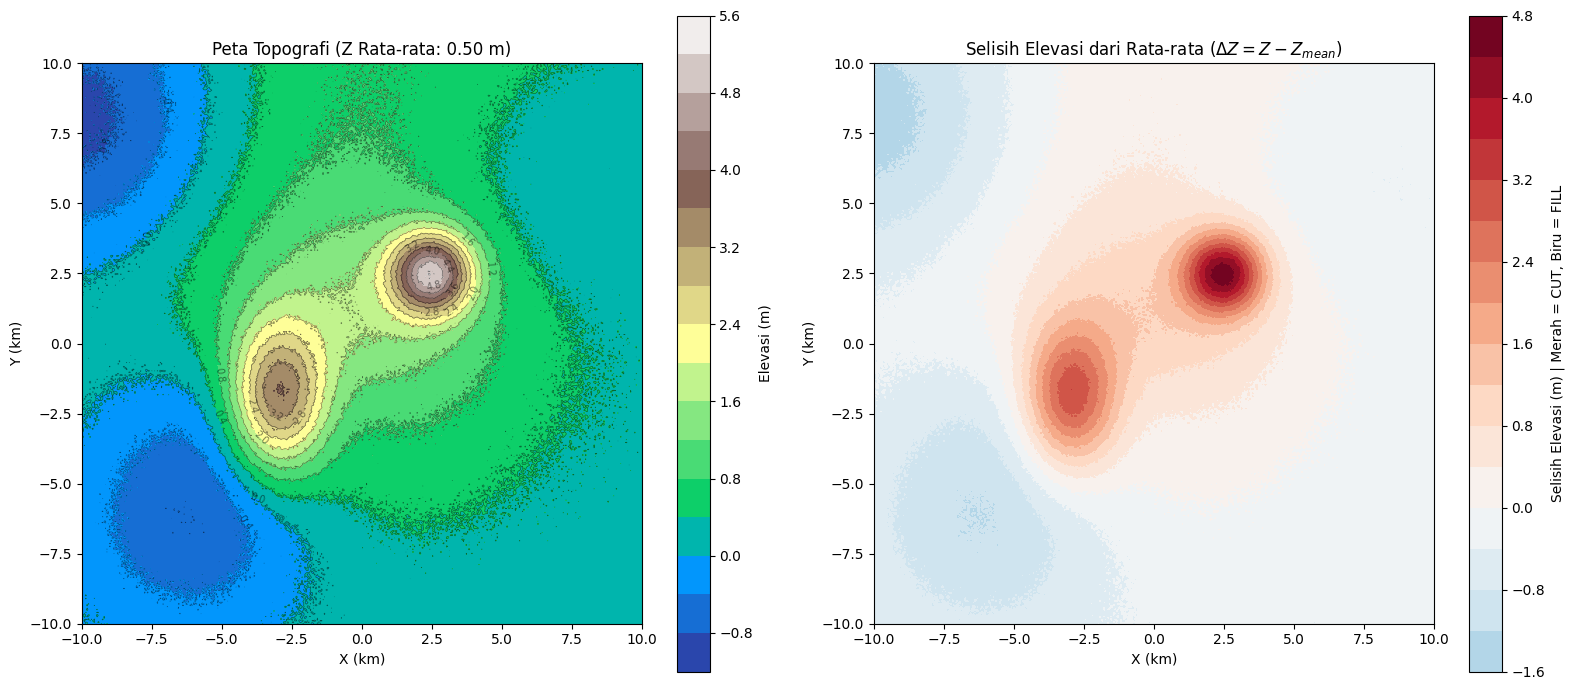

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

NPM = 72
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

dx = x[1] - x[0]
dy = y[1] - y[0]
AREA_ELEMENT = dx * dy

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

# Topografi Z
Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6) + peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# Perhitungan volume tanah
def calculate_cut_and_fill(Z, area_element):
    # 1. Tentukan Elevasi Perataan (Z_mean)
    Z_mean = np.mean(Z)
    delta_Z = Z - Z_mean

    # 2. Volume Potongan (Cut): Selisih positif (Z > Z_mean) - Sisi Atas
    Z_cut = np.where(delta_Z > 0, delta_Z, 0)
    max_cut_height = np.max(Z_cut)
    Area_Cut_km2 = np.sum(Z_cut > 0) * area_element
    V_cut_km3 = np.sum(Z_cut * area_element)

    # 3. Volume Urugan (Fill): Selisih negatif (Z < Z_mean) - Sisi Bawah
    Z_fill = np.where(delta_Z < 0, -delta_Z, 0)
    max_fill_depth = np.max(Z_fill)
    Area_Fill_km2 = np.sum(Z_fill > 0) * area_element
    V_fill_km3 = np.sum(Z_fill * area_element)
    conversion_factor = 1e6

    V_cut_m3 = V_cut_km3 * conversion_factor
    V_fill_m3 = V_fill_km3 * conversion_factor

    return Z_mean, V_cut_m3, V_fill_m3, delta_Z, max_cut_height, max_fill_depth, Area_Cut_km2, Area_Fill_km2

Z_mean, V_cut_m3, V_fill_m3, delta_Z, max_cut_height, max_fill_depth, Area_Cut_km2, Area_Fill_km2 = calculate_cut_and_fill(Z, AREA_ELEMENT)

# Output ringkasan numerik
print("Perhitungan Volume untuk Perataan")

print(f"Elevasi Rata-rata Area (Target Perataan): {Z_mean:.4f} meter")
print(f"Luas Total Area Analisis: {(np.max(X) - np.min(X)) * (np.max(Y) - np.min(Y)):.0f} km\u00B2")

# Sisi Atas
print("\nKomponen Integral Sisi Atas (Potongan):")
print(f"   Tinggi Potongan Maksimum (\u0394Z max)   : {max_cut_height:.4f} meter")
print(f"   Luas Area yang Dipotong (\u03A3 \u0394A) : {Area_Cut_km2:,.2f} km\u00B2")
print(f"   Formula Volume (Integral) V = \u03A3 (\u0394Z \u00D7 \u0394A):")
print(f"   Volume Potongan (V_cut)          : {V_cut_m3:,.2f} meter kubik (m\u00B3)")

# Sisi Bawah
print("\nKomponen Integral Sisi Bawah (Urugan):")
print(f"   Kedalaman Urugan Maksimum (\u0394Z max) : {max_fill_depth:.4f} meter")
print(f"   Luas Area yang Diurug (\u03A3 \u0394A)  : {Area_Fill_km2:,.2f} km\u00B2")
print(f"   Formula Volume (Integral) V = \u03A3 (\u0394Z \u00D7 \u0394A):")
print(f"   Volume Urugan (V_fill)           : {V_fill_m3:,.2f} meter kubik (m\u00B3)")

print("\nKesimpulan Akhir Volume Yang Dipindahkan:")
print(f"   Total Volume Tanah yang Harus Dipindahkan (Cut and Fill) adalah **{V_cut_m3:,.2f} m\u00B3**.")

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
levels = 20

# 1. Visualisasi Topografi Asli (Z)
cf0 = ax[0].contourf(X, Y, Z, levels=levels, cmap='terrain')
cs0 = ax[0].contour(X, Y, Z, levels=levels, linewidths=0.5, colors='black', alpha=0.5)
ax[0].clabel(cs0, fmt="%.1f", fontsize=7)
ax[0].set_title(f"Peta Topografi (Z Rata-rata: {Z_mean:.2f} m)")
ax[0].set_xlabel("X (km)")
ax[0].set_ylabel("Y (km)")
ax[0].set_aspect('equal', adjustable='box')
plt.colorbar(cf0, ax=ax[0], label="Elevasi (m)")

# 2. Visualisasi Selisih Ketinggian (Delta Z = Z - Z_mean)
max_abs_delta = np.max(np.abs(delta_Z))
norm_delta = colors.Normalize(vmin=-max_abs_delta, vmax=max_abs_delta)

cf1 = ax[1].contourf(X, Y, delta_Z, levels=levels, cmap='RdBu_r', norm=norm_delta)
ax[1].set_title(r"Selisih Elevasi dari Rata-rata ($\Delta Z = Z - Z_{mean}$)")
ax[1].set_xlabel("X (km)")
ax[1].set_ylabel("Y (km)")
ax[1].set_aspect('equal', adjustable='box')
plt.colorbar(cf1, ax=ax[1], label="Selisih Elevasi (m) | Merah = CUT, Biru = FILL")

plt.tight_layout()
plt.show()

Elevasi target perataan area adalah 0.5019 m.  
Berdasarkan ringkasan numerik, didapatkan informasi:  
- Potongan/Cut  
a) Tinggi maks. potongan : 4.7721 m (titik tertinggi yang harus dikeruk dan harus memotong tanah sedalam 4.7721 m untuk mencapai ketinggian datar 0.5019 m).  
b) Luas area potongan : 150.59 km² (area bukit yang harus dihilangkan untuk perataan sekitar 37.6% dari total area proyek).  
c) Volume potongan (V_cut) : 109,965,786.58 m³ (Pasokan material yang tersedia untuk uruguan).  

- Uruguan/Fill  
a) Kedalaman maks. : 1.5649 m (titik terdalam yang harus diisi/ditimbun setinggi 1.5649 m untuk mencapai ketinggian datar 0.5019 m).  
b) Luas area uruguan : 251.41 km² (lembah yang harus ditimbun material urugan untuk perataan sekitar 62.8% dari total area proyek).  
c) Volume uruguan (V_fill) : 109,965,786.58 m³ (total volume yang dibutuhkan untuk diisi di seluruh uruguan).  

Karena nilai V_cut sama dengan V_fill, maka hal ini mencapai keseimbangan cut and fill ideal yang berarti seluruh tanah hasil potongan dapat langsung digunakan untuk mengisi semua area urugan, sehingga tidak diperlukan material tanah tambahan dari luar (impor) dan tidak ada material yang harus dibuang (ekspor).  

Berdasarkan visualisasi, terlihat pada peta selisih elevasi menunjukkan bahwa warna merah (cut) memberi informasi di lokasi mana area yang harus dipotong. Titik merah paling gelap mewakili tinggi potongan maksimum, yaitu 4.7721 meter. Warna biru (fill) memberi informasi di lokasi mana area yang harus diurug. Titik biru paling gelap mewakili kedalaman urugan maksimum 1.5649 meter.  

Sehingga jawaban pada nomor 4a dan 4b adalah :    
4a) Banyak volume tanah yang harus dipindahkan adalah 109,965,786.58 m³.  
4b) Ketinggian akhir tanah yang rata adalah 0.5019 m.
